Name: Andrew Lake

Student Number: 22259775

# Task 2
Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.

Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### Rescale the Data
Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.

We might be able to skip this step

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### Scatterplot Function (to be used below for visualising a clustering)

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'yellow', 'khaki', 'pink', 'green', 'purple', 'silver', 'cyan', 'saddlebrown', 'deeppink'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# Task 2

## Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 

## Use the Elbow method to pick the best value of k.

## Attempt also another method for determining the best value of k. 

## Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. 

## Aim at producing meaningful clustering.

### Elbow method

Plot the sum of squared distances from the data points to the centers of the k-means clusters for various values of k

In [5]:
k_values = range(2, 25)
sum_of_squared_val = []
for k_val in k_values:
    clustered_data_sklearn_k_values = cluster.KMeans(n_clusters=k_val, n_init=10, max_iter=300).fit(data)
    sum_of_squared_val.append(clustered_data_sklearn_k_values.inertia_)
    print(f'K = {k_val} sum of squared distances = {clustered_data_sklearn_k_values.inertia_}')

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 2 sum of squared distances = 873.2211642146076


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 3 sum of squared distances = 765.7271923349016


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 4 sum of squared distances = 694.670030041426


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 5 sum of squared distances = 642.4445557471328


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 6 sum of squared distances = 598.5737159705277


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 7 sum of squared distances = 567.1420615110975


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 8 sum of squared distances = 537.4541825876709


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 9 sum of squared distances = 510.8082271708553


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 10 sum of squared distances = 492.4676263598464


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 11 sum of squared distances = 480.8666307745409


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 12 sum of squared distances = 462.7871232490893


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 13 sum of squared distances = 441.38016338856755


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 14 sum of squared distances = 436.48819257068584


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 15 sum of squared distances = 418.63236544427855


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 16 sum of squared distances = 413.496392625755


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 17 sum of squared distances = 399.1220237795797


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 18 sum of squared distances = 385.966051722636


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 19 sum of squared distances = 366.51518495040403


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 20 sum of squared distances = 361.02167580731583


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 21 sum of squared distances = 348.0186688528106


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 22 sum of squared distances = 338.09217292652716


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 23 sum of squared distances = 328.8011582844981


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 24 sum of squared distances = 319.16802107878766


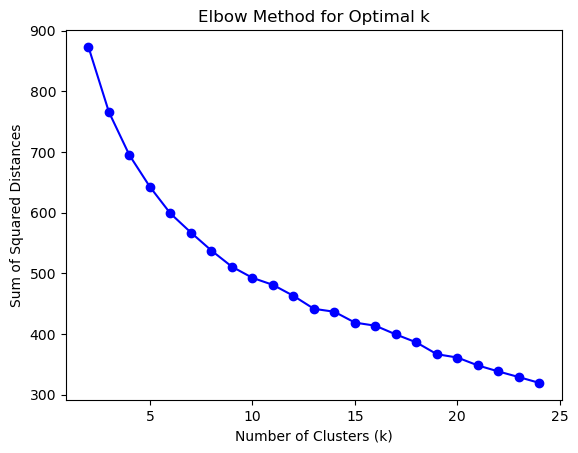

In [6]:
plt.plot(k_values, sum_of_squared_val, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

The elbow point is the point where the rate of decrease in sum of squared distances slows down significantly

We can see that there isn't a clear elbow but around 50 there a slowing of decrease

We can plot the difference in sum of squared distances between consecutive points to better see the elbow point

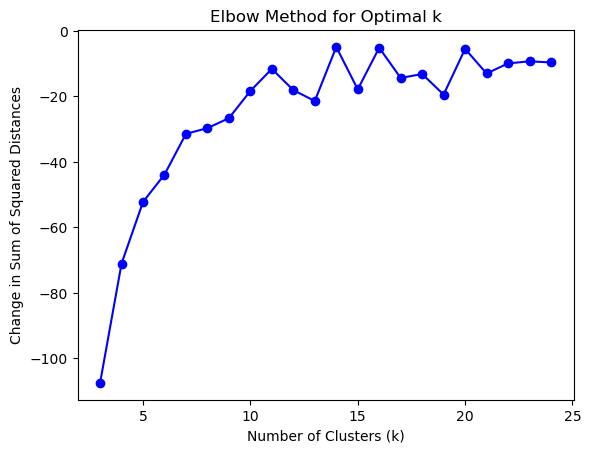

In [7]:
# Calculate the differences between consecutive sum of squared values
diffs = np.diff(sum_of_squared_val)

# Plot the differences against the values of k-1
plt.plot(k_values[1:], diffs, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Change in Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

The highest spike is the value we expect to be the best k value, we can check the list of differences between consecutive sum of squared values to get the actual k value

In [8]:
print(f'minimum difference value:{max(diffs)} at k = {diffs.argmax() + 2}')
# k range starts at 2

minimum difference value:-4.891970817881713 at k = 13


### Silhouette method

In [9]:
from sklearn.metrics import silhouette_score
sil_scores = []
for k_val in k_values:
    clustered_data_sklearn_k_values = cluster.KMeans(n_clusters=k_val, n_init=10, max_iter=300).fit(data)
    label = clustered_data_sklearn_k_values.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    sil_scores.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k_val, sil_coeff))

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.18654028464861303


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.18623355304670097


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.19497456616334385


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.19074207987614633


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.19626085060669424


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.209577735075929


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.20783427719298792


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.2173747777681568


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.24045764268505487


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=11, The Silhouette Coefficient is 0.22680564360248848


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=12, The Silhouette Coefficient is 0.2387216208991855


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=13, The Silhouette Coefficient is 0.24692592288787582


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=14, The Silhouette Coefficient is 0.24911798503495203


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=15, The Silhouette Coefficient is 0.25914199082184625


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=16, The Silhouette Coefficient is 0.24888578468188582


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=17, The Silhouette Coefficient is 0.25580869214421625


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=18, The Silhouette Coefficient is 0.26495703561495537


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=19, The Silhouette Coefficient is 0.2521785354261599


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=20, The Silhouette Coefficient is 0.2708885218225941


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=21, The Silhouette Coefficient is 0.27697769194950284


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=22, The Silhouette Coefficient is 0.28306413700843197


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=23, The Silhouette Coefficient is 0.27478613920734124


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=24, The Silhouette Coefficient is 0.29713068276834714


In [10]:
max_val = max(sil_scores)
print(f'max value is: {max_val} at k = {sil_scores.index(max_val) + 2}')
# k range starts at 2

max value is: 0.29713068276834714 at k = 24


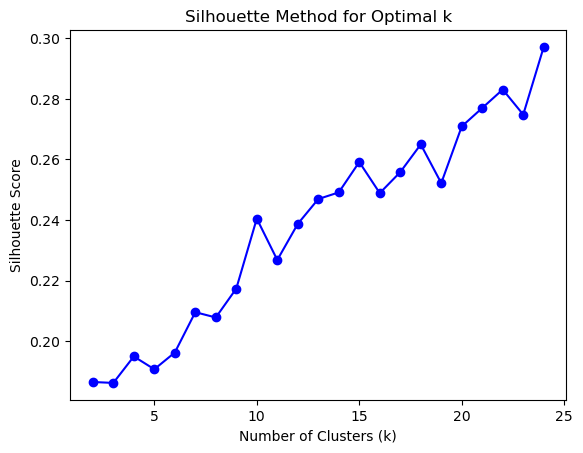

In [11]:
plt.plot(k_values, sil_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

The major difference between elbow and silhouette scores is that elbow only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc...

On my first attempt I used mannualy input k values and I found that k = 7 gave good results

Next I tested k over a range of 2 to 250, I did this because I was concerned there was no obvious elbow for lower ranges. In this I found that:

We get dratically different k values for elbow and silhouette methods

For the elbow method:

minimum difference value:
2.2588835966442957 at k = 33

For the silhouette method:

max value is:
0.4786039219100798 at k = 171

###############################################################################################################################

I wanted to keep the range the same for both k-means and bisecting k-means clustering to compare them, I found this range was taking to long to test so I changed it to 2 to 25

For this range we see

For the elbow method:

minimum difference value:
-5.531056778439336 at k = 21

For the silhouette method:

max value is:
0.28950562035800625 at k = 23

I found the elbow value is usually lower so I've chosen that for plotting a k-means clustering

### K-Means Clustering

Number of clusters $k$.

In [12]:
k = diffs.argmax() + 2

#### Run k-Means

In [13]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [14]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

Project both the data and the k-Means cluster centers to 2D.

In [15]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

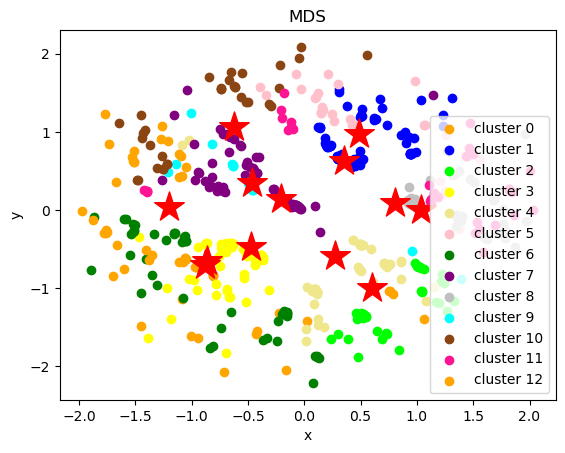

In [16]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:

Revealing the structure at many scales on a single map

Revealing data that lie in multiple, different, manifolds or clusters

Reducing the tendency to crowd points together at the center

Project both the data and the k-Means cluster centers to 2D.

In [17]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

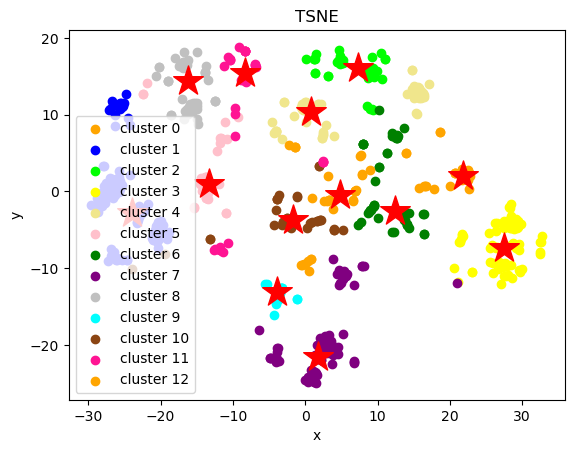

In [18]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

From the 2 ways of visualising the data above, tSNE is definetly clearer

Overview of MDS vs. t-SNE:

MDS tends to be useful for identifying global patterns in the data, but it can be less effective at preserving local structure.
 
t-SNE is more effective than MDS at revealing complex, nonlinear patterns in high-dimensional data.
 
t-SNE may be more effective at identifying clusters that are difficult to detect in the high-dimensional space. This is because t-SNE is better at preserving local structure, which is often where clusters are most apparent.

(t-SNE can be sensitive to its hyperparameters)

What we see:

We can see from the plots that t-SNE tends to look clearer, the clusters tend to group closer to the corresponding centers.

For MDS we can see that they are much more spread out around their centers

# Task 3

## Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.

## Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

### Bisecting K-Means

The BisectingKMeans is an iterative variant of KMeans, using divisive hierarchical clustering. Instead of creating all centroids at once, centroids are picked progressively based on a previous clustering: a cluster is split into two new clusters repeatedly until the target number of clusters is reached.

## Elbow Method

In [19]:
bk_values = range(2, 25)
sum_of_squared_bk_val = []
for bk_val in bk_values:
    clustered_data_sklearn_bk_values = cluster.BisectingKMeans(n_clusters=bk_val, n_init=10, max_iter=300).fit(data)
    sum_of_squared_bk_val.append(clustered_data_sklearn_bk_values.inertia_)
    print(f'K = {bk_val} sum of squared distances = {clustered_data_sklearn_bk_values.inertia_}')

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 2 sum of squared distances = 873.2211642146076


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 3 sum of squared distances = 778.1079819566235


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 4 sum of squared distances = 708.2137128880834


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 5 sum of squared distances = 644.4057518435067


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 6 sum of squared distances = 607.8830523466263


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 7 sum of squared distances = 566.9788483553715


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 8 sum of squared distances = 535.1061801735774


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 9 sum of squared distances = 514.1572902220581


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 10 sum of squared distances = 493.1659677975613


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 11 sum of squared distances = 475.354057309793


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 12 sum of squared distances = 461.1412223390798


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 13 sum of squared distances = 440.18102878094714


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 14 sum of squared distances = 425.98102590571875


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 15 sum of squared distances = 414.5460586776903


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 16 sum of squared distances = 397.9614622807434


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 17 sum of squared distances = 387.4840988907465


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 18 sum of squared distances = 376.6457712798085


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 19 sum of squared distances = 366.422127460765


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 20 sum of squared distances = 358.0448771628315


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 21 sum of squared distances = 349.3898908721028


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 22 sum of squared distances = 340.6750712855692


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 23 sum of squared distances = 332.1730889219509


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K = 24 sum of squared distances = 322.10439678355596


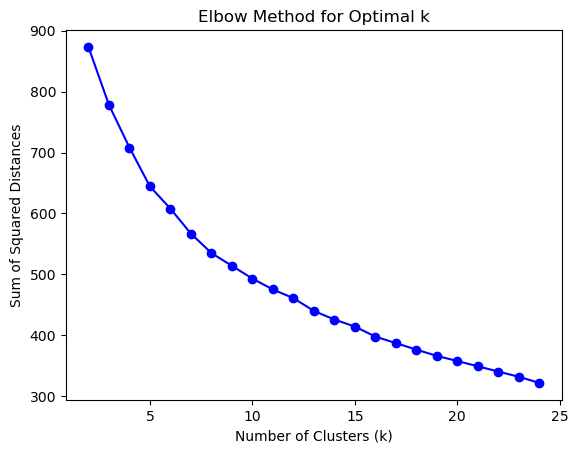

In [20]:
plt.plot(bk_values, sum_of_squared_bk_val, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
# Calculate the differences between consecutive sum of squared values
bk_diffs = np.diff(sum_of_squared_bk_val)

# Plot the differences against the values of k-1
plt.plot(bk_values[1:], bk_diffs, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Change in Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [22]:
print(f'minimum difference value:{max(bk_diffs)} at k = {bk_diffs.argmax() + 2}')
# k range starts at 2

minimum difference value:-8.377250297933529 at k = 19


## Silhouette Method

In [23]:
bk_sil_scores = []
for bk_val in bk_values:
    clustered_data_sklearn_bk_values = cluster.BisectingKMeans(n_clusters=bk_val, n_init=10, max_iter=300).fit(data)
    bk_label = clustered_data_sklearn_bk_values.labels_
    bk_sil_coeff = silhouette_score(data, bk_label, metric='euclidean')
    bk_sil_scores.append(bk_sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(bk_val, bk_sil_coeff))

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.18654028464861303


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.19002285804012878


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.18303894419255307


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.19910719840109595


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.21301642807229662


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.20329777906131877


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.21722311360636645


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.22609464710467345


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.23460360428177934


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=11, The Silhouette Coefficient is 0.23961367670766315


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=12, The Silhouette Coefficient is 0.2513906157793856


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=13, The Silhouette Coefficient is 0.2615288132143659


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=14, The Silhouette Coefficient is 0.25700318820821605


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=15, The Silhouette Coefficient is 0.26016567898882603


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=16, The Silhouette Coefficient is 0.26716222694412983


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=17, The Silhouette Coefficient is 0.27455864046075346


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=18, The Silhouette Coefficient is 0.2786749886397812


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=19, The Silhouette Coefficient is 0.281528824216747


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=20, The Silhouette Coefficient is 0.29176778899043926


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=21, The Silhouette Coefficient is 0.27879318837569733


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=22, The Silhouette Coefficient is 0.27922536748423654


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=23, The Silhouette Coefficient is 0.2920478608478134


C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=24, The Silhouette Coefficient is 0.2955265560302381


In [24]:
plt.plot(bk_values, bk_sil_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [25]:
bk_max_val = max(bk_sil_scores)
print(f'max value is: {bk_max_val} at k = {bk_sil_scores.index(bk_max_val) + 2}')
# k range starts at 2

max value is: 0.2955265560302381 at k = 24


For Elbow Method:

minimum difference value:

-4.27825873623533 at k = 19

For Silouette Method:

max value is:

0.29542960225502274 at k = 24

#########################################################################

COMPARED TO K-MEANS

For the elbow method:

minimum difference value:
-5.531056778439336 at k = 21

For the silhouette method:

max value is:
0.28950562035800625 at k = 23


We are getting a lower value for K

### Bisecting K-Means Clustering

In [26]:
bk = bk_diffs.argmax() + 2

Run k-Means

In [27]:
clustered_data_sklearn_bk = cluster.BisectingKMeans(n_clusters=bk, n_init=10, max_iter=300).fit(data)

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### Apply a manifold-learning technique to project the data set to a 2D space

Append the cluster centers to the dataset.

In [28]:
data_and_centers = np.r_[data,clustered_data_sklearn_bk.cluster_centers_]

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [29]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


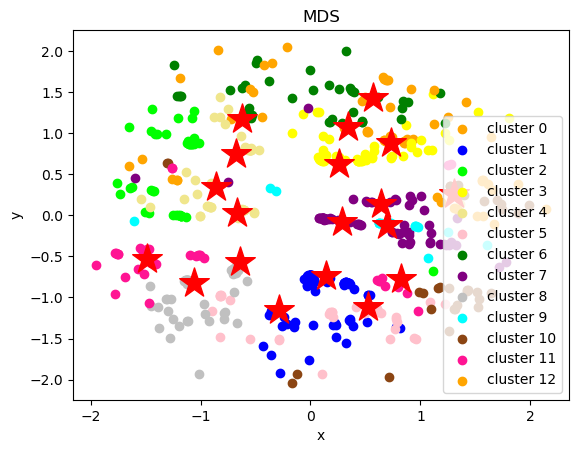

In [30]:
clustering_scatterplot(points=XYcoordinates[:-bk,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-bk:,:], 
                       title='MDS')

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [31]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


In [32]:
clustering_scatterplot(points=XYcoordinates[:-bk,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-bk:,:], 
                       title='TSNE')

What we expect:

K-means aims to minimize the sum of squared distances between the data points and their nearest cluster centers.
It assigns each data point to the nearest center and updates the center's position to the mean of the points assigned to it

Bisecting K-means repeatedly bisects the cluster with the largest sum of squared distances.
It starts with a single cluster containing all the data points and then iteratively bisects it into two sub-clusters until K clusters are formed
Bisecting K-means requires more iterations to converge BUT it can handle outliers better.

What we see:

For MDS, visually it's unclear which is better, it's clear it has differnet cluaters also it can be hard to see which center corresponds to which cluster

From a visual inspection t-SNE still looks good but comparing the two, there seems to be more points graviting towards the centers of different clusters, this could be positive though as maybe k-means was showing signs of overfitting

We definitively noticed it takes much longer to iterate through k value using bisecting k-means

## Third option incase K-Means and Bisecting K-means are too similar

## BIRCH

## BIRCH clustering Method - (Balanced Iterative Reducing and Clustering using Hierarchies)

It is a memory-efficient, online-learning algorithm provided as an alternative to MiniBatchKMeans. It constructs a tree data structure with the cluster centroids being read off the leaf. These can be either the final cluster centroids or can be provided as input to another clustering algorithm such as AgglomerativeClustering.

note there is no elbow method for the BIRCH clustering method

We can however use the silouette method

## Silouette Method

In [33]:
# Calculate the silhouette scores for different values of B and T
b_values = range(2, 25)
t_values = np.arange(0.1, 1.1, 0.1)
# to get the t & b vals theat correspond to the best silouette score
b_sil_scores = []
b_vals = []
t_vals = []
for b in b_values:
    b_vals.append(b)
    for t in t_values:
        clustered_data_sklearn_b_values = cluster.Birch(branching_factor=b, threshold=t, n_clusters=None).fit(data)
        b_label = clustered_data_sklearn_b_values.labels_
        b_sil_coeff = silhouette_score(data, b_label)
        b_sil_scores.append(b_sil_coeff)
        t_vals.append(t)
        print("For b = {} & t = {}, The Silhouette Coefficient is {}".format(b, t, b_sil_coeff))

For b = 2 & t = 0.1, The Silhouette Coefficient is 0.1914217116201638
For b = 2 & t = 0.2, The Silhouette Coefficient is 0.2854093422508725
For b = 2 & t = 0.30000000000000004, The Silhouette Coefficient is 0.3325788844780192
For b = 2 & t = 0.4, The Silhouette Coefficient is 0.3525518900725307
For b = 2 & t = 0.5, The Silhouette Coefficient is 0.3600898752330571
For b = 2 & t = 0.6, The Silhouette Coefficient is 0.3270356478813469
For b = 2 & t = 0.7000000000000001, The Silhouette Coefficient is 0.4118128907986624
For b = 2 & t = 0.8, The Silhouette Coefficient is 0.32552049825532964
For b = 2 & t = 0.9, The Silhouette Coefficient is 0.26749627287122796
For b = 2 & t = 1.0, The Silhouette Coefficient is 0.24162794971974547
For b = 3 & t = 0.1, The Silhouette Coefficient is 0.22089300265960177
For b = 3 & t = 0.2, The Silhouette Coefficient is 0.323119403939474
For b = 3 & t = 0.30000000000000004, The Silhouette Coefficient is 0.35970652017612054
For b = 3 & t = 0.4, The Silhouette Coe

For b = 13 & t = 0.4, The Silhouette Coefficient is 0.3949628560443502
For b = 13 & t = 0.5, The Silhouette Coefficient is 0.42290901221332516
For b = 13 & t = 0.6, The Silhouette Coefficient is 0.43810705235588343
For b = 13 & t = 0.7000000000000001, The Silhouette Coefficient is 0.3511505736794416
For b = 13 & t = 0.8, The Silhouette Coefficient is 0.3059758373561309
For b = 13 & t = 0.9, The Silhouette Coefficient is 0.2675499183284376
For b = 13 & t = 1.0, The Silhouette Coefficient is 0.23668373759083422
For b = 14 & t = 0.1, The Silhouette Coefficient is 0.23241620005648952
For b = 14 & t = 0.2, The Silhouette Coefficient is 0.35088982170577004
For b = 14 & t = 0.30000000000000004, The Silhouette Coefficient is 0.4040579190616461
For b = 14 & t = 0.4, The Silhouette Coefficient is 0.4430552518332644
For b = 14 & t = 0.5, The Silhouette Coefficient is 0.4366050290363622
For b = 14 & t = 0.6, The Silhouette Coefficient is 0.3667706042736417
For b = 14 & t = 0.7000000000000001, The 

For b = 24 & t = 0.4, The Silhouette Coefficient is 0.43541882498006224
For b = 24 & t = 0.5, The Silhouette Coefficient is 0.43463504703702827
For b = 24 & t = 0.6, The Silhouette Coefficient is 0.4041019857188186
For b = 24 & t = 0.7000000000000001, The Silhouette Coefficient is 0.3280694421216688
For b = 24 & t = 0.8, The Silhouette Coefficient is 0.29834523699917276
For b = 24 & t = 0.9, The Silhouette Coefficient is 0.24515756619828522
For b = 24 & t = 1.0, The Silhouette Coefficient is 0.2115527592145285


In [34]:
# allows us the create a list of equal length to te 
bt_combined = []
for b in b_vals:
    for t in zip([b]*len(t_values),t_vals):
        bt_combined.append(t)

# print(len(bt_combined))
# print(len(b_sil_scores))
# bt_combined[1]
# bt_combined[1][0]
# bt_combined[1][1]

In [35]:
# get the B & T values
b_max_val = max(b_sil_scores)
temp_index = b_sil_scores.index(b_max_val)
print(f'max value is: {b_max_val} at b = {bt_combined[temp_index + 2][0]} & t = {bt_combined[temp_index + 2][1]}')

max value is: 0.4599917974863088 at b = 17 & t = 0.6


## BIRCH clustering

In [36]:
b = bt_combined[temp_index + 2][0]
t = bt_combined[temp_index + 2][1]

In [37]:
clustered_data_sklearn_b_values = cluster.Birch(branching_factor=b, threshold=t, n_clusters=None).fit(data)

## Apply a manifold-learning technique to project the data set to a 2D space

#### Apply multi-dimensional scaling (MDS) to project both the data and the BIRCH cluster centers to a 2D space

In [38]:
#XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data)
print("transformation complete")

C:\Users\lake9\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


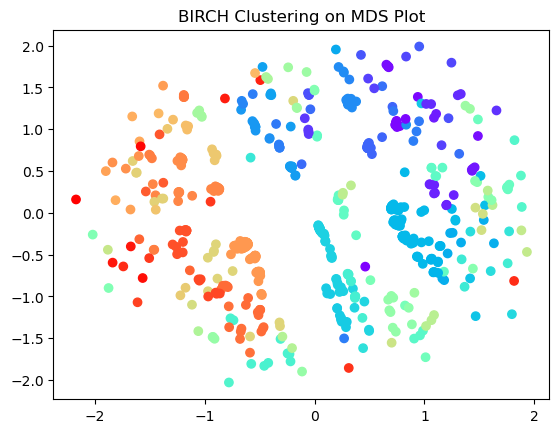

In [39]:
# Plot the clusters on the MDS plot
plt.scatter(XYcoordinates[:, 0], XYcoordinates[:, 1], c=clustered_data_sklearn_b_values.labels_, cmap='rainbow')
plt.title('BIRCH Clustering on MDS Plot')
plt.show()

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [40]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data)
print("transformation complete")

transformation complete


In [41]:
# Plot the clusters on the t-SNE plot
plt.scatter(XYcoordinates[:, 0], XYcoordinates[:, 1], c=clustered_data_sklearn_b_values.labels_, cmap='rainbow')
plt.title('BIRCH Clustering on t-SNE Plot')
plt.show()

## Using a Dendrogram

Dendrogram is used to determine the clusters and thorugh it we are able to see the number of possible clusters. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.

(method=’ward’ uses the Ward variance minimization algorithm)

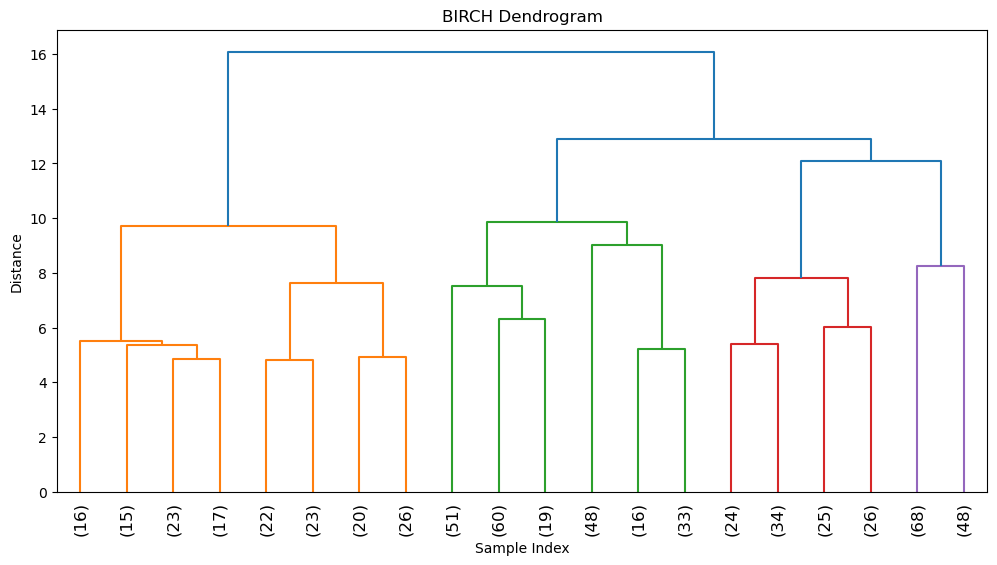

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('BIRCH Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12.)
plt.show()

the smaller the height of the linkage, the more similar. We see a big diiference between orange and the rest

What do we expect:

In BIRCH there's no k value instead we are interested in b and t.
   
b is the branching factor
- controls the maximum number of sub-clusters that can be created at each node in the tree
- A higher B can lead to larger and more balanced sub-clusters BUT will take     

t is the threshold
- controls the maximum diameter of a sub-cluster
- if diameter exceeds T, the sub-cluster is split into smaller sub-clusters
- smaller value of T can lead to more detailed clusters, but can also lead to overfitting and increased computational complexity.

What we see:

The elbow method doesn't work so we went with the silouette method for determining the best values of b and t.

Our best value are:

b = 17 & t = 0.6

We seem to have roughly the same number of clusters

We see that our MDS and t_SNE are less clear for BIRCH but...

We have also a dendrogram which is much clearer, at the bottom it shows each cluster and how similar they are to one another. We can see that orange is noticeably seperated from the rest and we see in the previous plot that orange is off the side so it is expected.

The dendrogram is good but I feel without the t-SNE or MDS to compare it too it wouldn't be very clear. Both together offer a clear view of the clusters
